In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from tensorflow import keras
sns.set_style('dark')

In [2]:
# !wget "https://www.dropbox.com/s/dh8vr8y0sz4m5v9/all_data.gzip?dl=0" -O all_data.gzip

In [3]:
selected_features = []
dataset_types = ['Train', 'Validation', 'Test']

ini_data = {}

data = {}
stat_data = {}

file_name ='all_data.gzip'
all_data = pd.read_parquet(file_name)
all_data.head()

Type Dataset  Year  Day  Hour  Minute  Field magnitude average nT  \
69408  Train      T1  1998   45     0       0                        5.08   
69409  Train      T1  1998   45     0       5                        4.97   
69410  Train      T1  1998   45     0      10                        4.91   
69411  Train      T1  1998   45     0      15                        4.84   
69412  Train      T1  1998   45     0      20                        4.83   

       BX nT (GSE GSM)  BY nT (GSE)  BZ nT (GSE)  ...  Vz Velocity km/s  \
69408             1.60        -4.44        -0.58  ...              16.6   
69409             3.90        -1.72         1.24  ...              33.5   
69410             4.01        -1.20         2.53  ...              45.9   
69411             3.90        -1.29         2.48  ...              41.7   
69412             4.18        -1.24         2.01  ...              43.0   

       Proton Density n/cc  SYM/H nT       Date  month  day  \
69408                 5.45     -12.0 1998-02-14      2   14   
69409                 6.04     -12.0 1998-02-14      2   14   
69410                 5.78     -13.0 1998-02-14      2   14   
69411                 5.55     -13.0 1998-02-14      2   14   
69412                 5.94     -13.0 1998-02-14      2   14   

                     time       date     B**2    BY**2  
69408 1998-02-14 00:00:00 1998-02-14  22.6154  12.6025  
69409 1998-02-14 00:05:00 1998-02-14  19.7062   4.4521  
69410 1998-02-14 00:10:00 1998-02-14  23.9443   5.3361  
69411 1998-02-14 00:15:00 1998-02-14  23.0597   5.5696  
69412 1998-02-14 00:20:00 1998-02-14  23.0532   4.3264  

[5 rows x 25 columns]

In [4]:
df = all_data.sort_values('time')
df['datetime'] = pd.to_datetime(
    pd.DataFrame({
        'year' : df.Date.dt.year,
        'month': df.Date.dt.month,
        'day': df.Date.dt.day,
        'hour' : df.Hour,
        'minute' : df.Minute
    })
)
df = df.set_index(df["datetime"])

df.head()

Type Dataset  Year  Day  Hour  Minute  \
datetime                                                      
1998-02-14 00:00:00  Train      T1  1998   45     0       0   
1998-02-14 00:05:00  Train      T1  1998   45     0       5   
1998-02-14 00:10:00  Train      T1  1998   45     0      10   
1998-02-14 00:15:00  Train      T1  1998   45     0      15   
1998-02-14 00:20:00  Train      T1  1998   45     0      20   

                     Field magnitude average nT  BX nT (GSE GSM)  BY nT (GSE)  \
datetime                                                                        
1998-02-14 00:00:00                        5.08             1.60        -4.44   
1998-02-14 00:05:00                        4.97             3.90        -1.72   
1998-02-14 00:10:00                        4.91             4.01        -1.20   
1998-02-14 00:15:00                        4.84             3.90        -1.29   
1998-02-14 00:20:00                        4.83             4.18        -1.24   

                     BZ nT (GSE)  ...  Proton Density n/cc  SYM/H nT  \
datetime                          ...                                  
1998-02-14 00:00:00        -0.58  ...                 5.45     -12.0   
1998-02-14 00:05:00         1.24  ...                 6.04     -12.0   
1998-02-14 00:10:00         2.53  ...                 5.78     -13.0   
1998-02-14 00:15:00         2.48  ...                 5.55     -13.0   
1998-02-14 00:20:00         2.01  ...                 5.94     -13.0   

                          Date  month  day                time       date  \
datetime                                                                    
1998-02-14 00:00:00 1998-02-14      2   14 1998-02-14 00:00:00 1998-02-14   
1998-02-14 00:05:00 1998-02-14      2   14 1998-02-14 00:05:00 1998-02-14   
1998-02-14 00:10:00 1998-02-14      2   14 1998-02-14 00:10:00 1998-02-14   
1998-02-14 00:15:00 1998-02-14      2   14 1998-02-14 00:15:00 1998-02-14   
1998-02-14 00:20:00 1998-02-14      2   14 1998-02-14 00:20:00 1998-02-14   

                        B**2    BY**2            datetime  
datetime                                                   
1998-02-14 00:00:00  22.6154  12.6025 1998-02-14 00:00:00  
1998-02-14 00:05:00  19.7062   4.4521 1998-02-14 00:05:00  
1998-02-14 00:10:00  23.9443   5.3361 1998-02-14 00:10:00  
1998-02-14 00:15:00  23.0597   5.5696 1998-02-14 00:15:00  
1998-02-14 00:20:00  23.0532   4.3264 1998-02-14 00:20:00  

[5 rows x 26 columns]

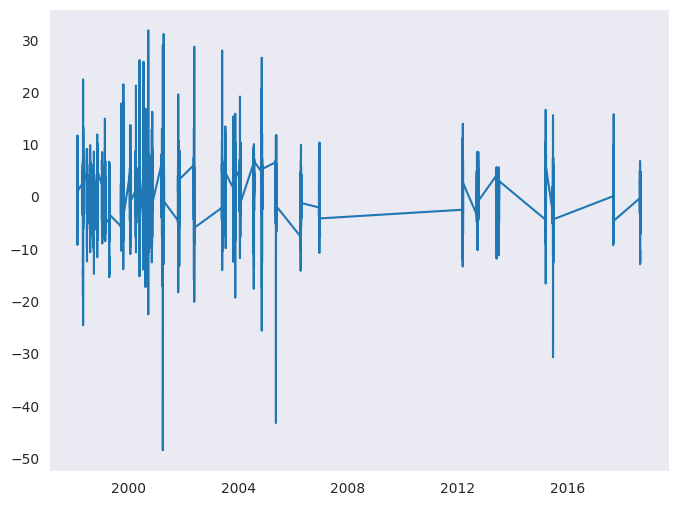

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot( df["BX nT (GSE GSM)"]);

In [6]:
import plotly.express as px
px.line(df, x=df.index, y='BX nT (GSE GSM)', range_x=['2001-03-14', '2001-04-16'])

In [7]:
df.corr(numeric_only=True)

Year           Day          Hour  \
Year                        1.000000e+00  6.030268e-02  5.475726e-15   
Day                         6.030268e-02  1.000000e+00 -3.686576e-16   
Hour                        5.475726e-15 -3.686576e-16  1.000000e+00   
Minute                     -3.084419e-15  8.786013e-16 -1.487486e-18   
Field magnitude average nT -1.391508e-01 -7.191236e-03 -1.464013e-02   
BX nT (GSE GSM)            -3.402513e-02  5.089150e-04 -1.863445e-03   
BY nT (GSE)                -3.882956e-02  5.622540e-02 -7.759280e-03   
BZ nT (GSE)                -2.377373e-02  5.148179e-02  8.214860e-03   
BY nT (GSM)                -4.608711e-02  4.574368e-02 -5.333939e-03   
BZ nT (GSM)                -6.861904e-03  4.778174e-02  8.476281e-03   
Speed km/s                  5.682264e-03  1.284367e-01 -4.577206e-03   
Vx Velocity km/s           -6.245967e-03 -1.293508e-01  4.610389e-03   
Vy Velocity km/s           -7.697098e-04  6.628290e-02 -7.061760e-05   
Vz Velocity km/s           -2.631893e-02  5.386696e-02 -2.293737e-02   
Proton Density n/cc        -5.142372e-02 -5.014493e-02  2.289212e-02   
SYM/H nT                    5.366599e-02 -6.460405e-02  3.019297e-02   
month                       6.209102e-02  9.963799e-01 -2.664411e-16   
day                        -1.343269e-02 -7.456116e-02 -7.559460e-16   
B**2                       -7.519733e-02  1.791909e-02 -1.977300e-02   
BY**2                      -7.721729e-02  1.923352e-02 -1.490352e-02   

                                  Minute  Field magnitude average nT  \
Year                       -3.084419e-15                   -0.139151   
Day                         8.786013e-16                   -0.007191   
Hour                       -1.487486e-18                   -0.014640   
Minute                      1.000000e+00                   -0.000721   
Field magnitude average nT -7.214201e-04                    1.000000   
BX nT (GSE GSM)            -6.360486e-04                   -0.065710   
BY nT (GSE)                -1.131387e-03                    0.190153   
BZ nT (GSE)                 2.705166e-03                   -0.099921   
BY nT (GSM)                -1.010178e-03                    0.197106   
BZ nT (GSM)                 2.417114e-03                   -0.146753   
Speed km/s                  9.814610e-05                    0.313855   
Vx Velocity km/s           -1.315182e-04                   -0.308677   
Vy Velocity km/s           -2.303120e-03                    0.088023   
Vz Velocity km/s            1.412649e-03                   -0.006139   
Proton Density n/cc         1.060239e-04                    0.339553   
SYM/H nT                   -1.824608e-05                   -0.511834   
month                       8.281954e-16                   -0.009969   
day                         4.398873e-16                    0.037079   
B**2                       -9.855756e-04                    0.905843   
BY**2                      -6.366937e-04                    0.712701   

                            BX nT (GSE GSM)  BY nT (GSE)  BZ nT (GSE)  \
Year                              -0.034025    -0.038830    -0.023774   
Day                                0.000509     0.056225     0.051482   
Hour                              -0.001863    -0.007759     0.008215   
Minute                            -0.000636    -0.001131     0.002705   
Field magnitude average nT        -0.065710     0.190153    -0.099921   
BX nT (GSE GSM)                    1.000000    -0.321328    -0.036164   
BY nT (GSE)                       -0.321328     1.000000    -0.013777   
BZ nT (GSE)                       -0.036164    -0.013777     1.000000   
BY nT (GSM)                       -0.312885     0.955659     0.014742   
BZ nT (GSM)                       -0.037619    -0.053174     0.935408   
Speed km/s                         0.001693     0.034473     0.020869   
Vx Velocity km/s                  -0.002223    -0.033332    -0.020371   
Vy Velocity km/s                  -0.039020     0.080630     

<Axes: >

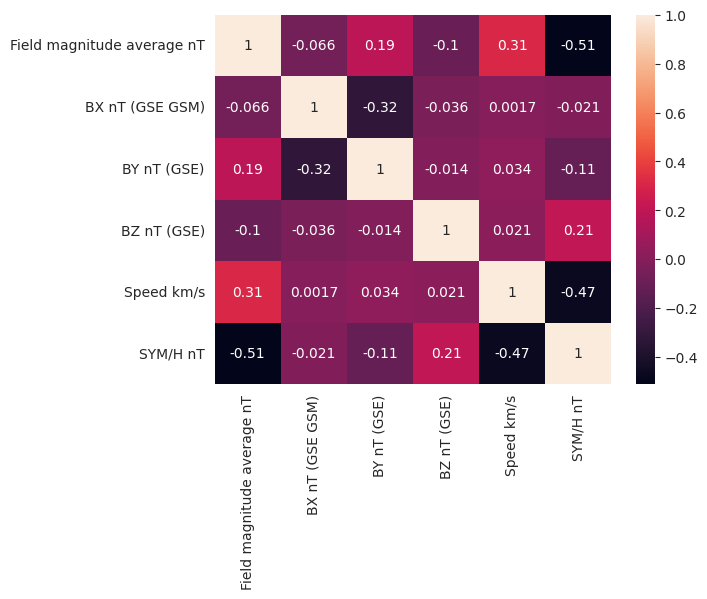

In [8]:
dfred=df[["Field magnitude average nT","BX nT (GSE GSM)","BY nT (GSE)","BZ nT (GSE)","Speed km/s","SYM/H nT"]]
Var_Corr = dfred.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [9]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)                     # 1,2,3 -> NaN,1,2
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values  # NaN,1,2 -> 3,1,2
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))

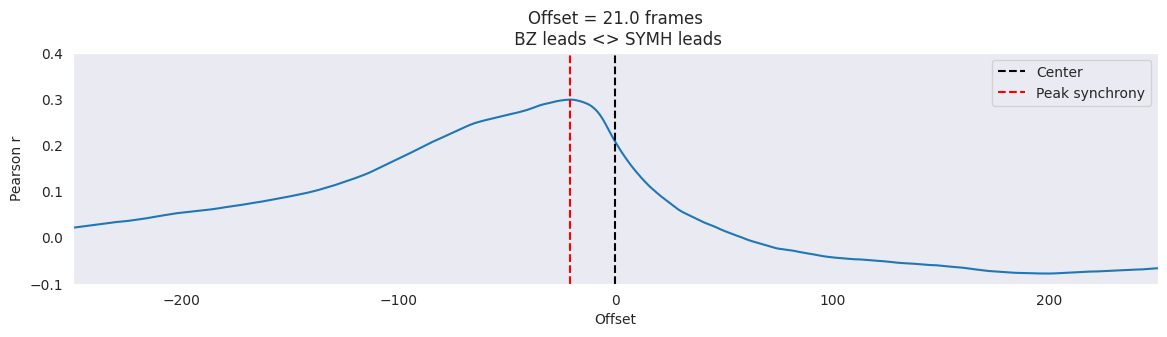

In [10]:
d1 = dfred['BZ nT (GSE)']
d2 = dfred['SYM/H nT']
seconds = 1
fps = 250
offsets = np.arange(-int(seconds*fps),int(seconds*fps+1))
rs = [crosscorr(d1,d2, lag) for lag in offsets]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(offsets, rs)
ax.axvline(0,color='k',linestyle='--',label='Center')
ax.axvline(offsets[np.argmax(rs)],color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\n BZ leads <> SYMH leads', xlim=[-250, 250], ylim=[-0.1,0.4], xlabel='Offset',ylabel='Pearson r')

plt.legend()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [12]:
df1D=df["BZ nT (GSE)"][0:200]
df1D

datetime
1998-02-14 00:00:00   -0.58
1998-02-14 00:05:00    1.24
1998-02-14 00:10:00    2.53
1998-02-14 00:15:00    2.48
1998-02-14 00:20:00    2.01
                       ... 
1998-02-14 16:15:00    2.57
1998-02-14 16:20:00    0.02
1998-02-14 16:25:00   -1.23
1998-02-14 16:30:00   -0.49
1998-02-14 16:35:00    1.04
Name: BZ nT (GSE), Length: 200, dtype: float64

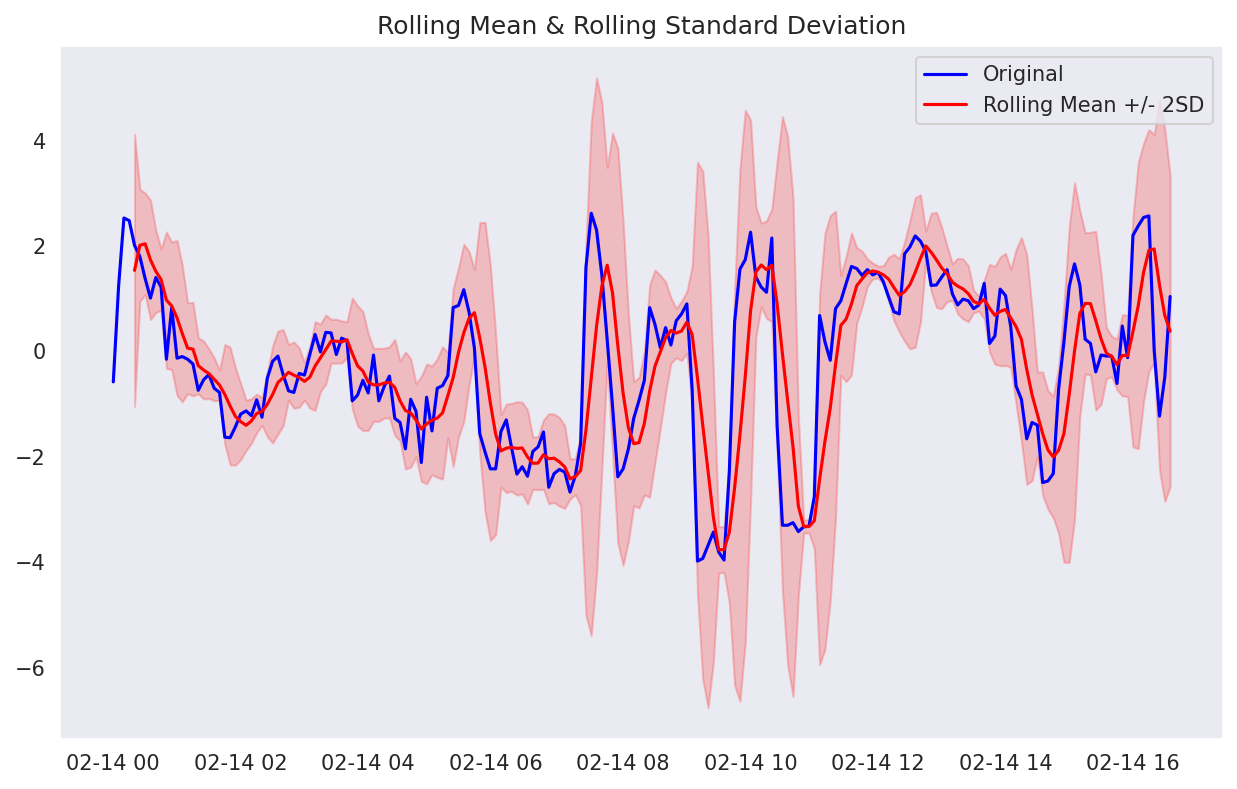

In [13]:
rolling_mean = df1D.rolling(window = 5).mean()
rolling_std = df1D.rolling(window = 5).std()
plt.figure(figsize=(10,6), dpi=150)
plt.plot(df1D, color = 'blue', label = 'Original')

# Band plot for Rolling Mean with +/- 2SD
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean +/- 2SD')
plt.fill_between(rolling_mean.index, rolling_mean-2*rolling_std, rolling_mean+2*rolling_std, color = 'red', alpha = 0.2)

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [14]:
result = adfuller(df1D)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.075706158116897
p-value: 1.5684631253098222e-05
Critical Values:
	1%: -3.4638151713286316
	5%: -2.876250632135043
	10%: -2.574611347821651


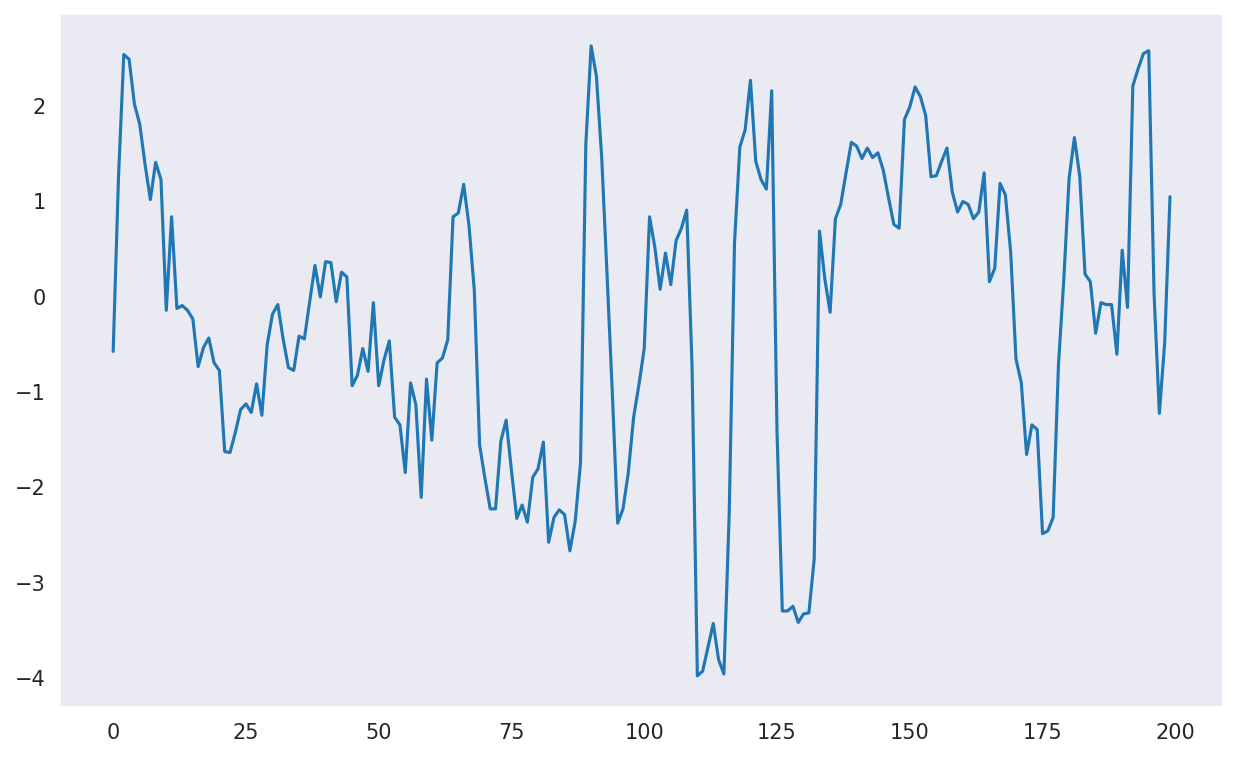

In [15]:
timeseries = df[["BZ nT (GSE)"]][0:200].values.astype('float32')

plt.figure(figsize=(10,6), dpi=150)
plt.plot(timeseries)
plt.show()

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

In [17]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [18]:
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    X = np.array(X)
    y = np.array(y)
    return torch.tensor(X), torch.tensor(y)

In [19]:
lookback = 4
X_train, y_train    = create_dataset(train, lookback=lookback)
X_test, y_test      = create_dataset(test, lookback=lookback)

In [20]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [21]:
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=32)
test_loader = data.DataLoader(data.TensorDataset(X_test, y_test), shuffle=False, batch_size=32)

In [22]:
from accelerate import Accelerator

/home/xteca/Documents/Project/Machine_Learning/MITP2023/Sequential/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [23]:
accelerator = Accelerator()
device = accelerator.device

model, optimizer, train_loader, test_loader = accelerator.prepare(
    model, optimizer, loader, test_loader
)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [24]:
n_epochs = 5000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        accelerator.backward(loss)
        optimizer.step()
    # Validation
    if epoch % 500 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = torch.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = torch.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 1.6959, test RMSE 1.3751
Epoch 500: train RMSE 0.7264, test RMSE 0.7502
Epoch 1000: train RMSE 0.6869, test RMSE 0.8144
Epoch 1500: train RMSE 0.6345, test RMSE 0.8820
Epoch 2000: train RMSE 0.5934, test RMSE 0.8825
Epoch 2500: train RMSE 0.5639, test RMSE 0.9536
Epoch 3000: train RMSE 0.5420, test RMSE 1.0232
Epoch 3500: train RMSE 0.5258, test RMSE 1.0659
Epoch 4000: train RMSE 0.5172, test RMSE 1.0787
Epoch 4500: train RMSE 0.5112, test RMSE 1.1039


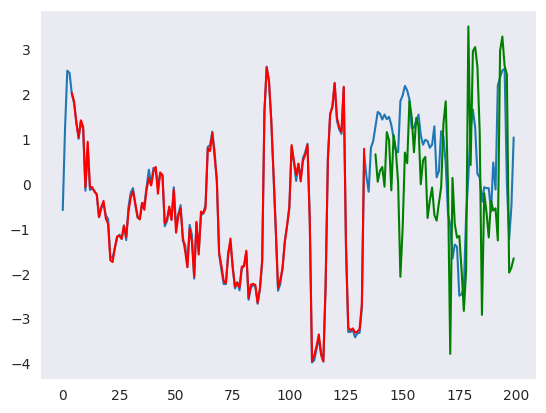

In [25]:
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train).cpu().numpy()
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = y_pred
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_test).cpu().numpy()
    y_pred = y_pred[:, -1, :]
    test_plot[train_size+lookback:len(timeseries)] = y_pred
# plot
plt.plot(timeseries)
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()